In [20]:
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline



df=pd.read_csv('data/preprocess.csv')

y = np.array(df['shot_made_flag']).astype(int)
X = df.drop('shot_made_flag', 1)


cat_ftrs = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y','playoffs','home_play']

cont_ftrs1 = ['shot_distance', 'time_remaining']

X[cont_ftrs1] = X[cont_ftrs1].astype(float)
y = y.astype(float)

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# one-hot encoder

ohe = OneHotEncoder(sparse=False)
cat_values = ohe.fit_transform(X[cat_ftrs])
cat_ftr_names = ohe.get_feature_names(cat_ftrs)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)




X_process = pd.concat([df_cat,X[cont_ftrs1]],axis=1)

ss = StandardScaler()
X_process[cont_ftrs1] = ss.fit_transform(X_process[cont_ftrs1])
#df_cont1 = pd.DataFrame(data=count_values,columns = cont_ftrs1)

In [24]:
random_state = 50
n_folds=5

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=50)
	cv_results = cross_val_score(model, X_process, y, cv=kfold, scoring = make_scorer(accuracy_score))
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.681364 (0.003209)
GBM: 0.680858 (0.003396)
RF: 0.642721 (0.003642)
ET: 0.642332 (0.003909)


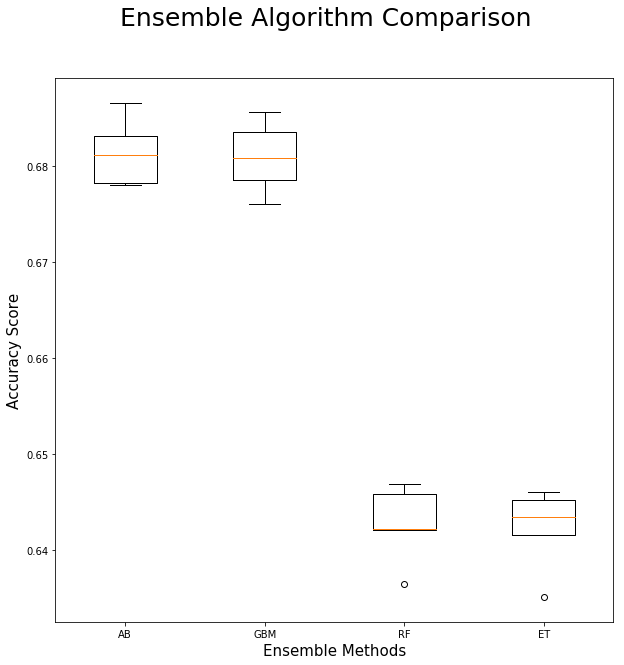

In [26]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Ensemble Algorithm Comparison',fontsize=25)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_ylabel('Accuracy Score',fontsize=15)
ax.set_xlabel('Ensemble Methods',fontsize=15)
ax.set_xticklabels(names,fontsize=10)
plt.savefig('figures/Ensemble Comparison.pdf',dpi=300)
plt.show()

## XGboost

In [34]:
import xgboost as xgb

In [50]:
param_grid = {"learning_rate": [0.03],
              "n_estimators": [2000],
              "seed": [0],
              #"reg_alpha": [0e0,0.01,0.1,1.,10.,100],
              #"reg_lambda": [0e0,0.01,0.1,1.,10.,100],
              "missing": [np.nan], 
              #"max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}

In [53]:
from sklearn.model_selection import ParameterGrid
XGB = xgb.XGBRegressor()
XGB.set_params(**ParameterGrid(param_grid)[0])
XGB.fit(X_train,y_train,early_stopping_rounds=50,verbose=False)

ValueError: feature_names may not contain [, ] or <

In [63]:
df=pd.read_csv('data/preprocess.csv')

y = np.array(df['shot_made_flag']).astype(int)
X = df.drop('shot_made_flag', 1)
X=X.drop('loc_x', axis=1)
X=X.drop('loc_y', axis=1)


cat_ftrs = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent','playoffs','home_play']

cont_ftrs1 = ['shot_distance', 'time_remaining']

X[cont_ftrs1] = X[cont_ftrs1].astype(float)
y = y.astype(float)


In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# one-hot encoder

ohe = OneHotEncoder(sparse=False)
cat_values = ohe.fit_transform(X[cat_ftrs])
cat_ftr_names = ohe.get_feature_names(cat_ftrs)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)




X_process = pd.concat([df_cat,X[cont_ftrs1]],axis=1)

ss = StandardScaler()
X_process[cont_ftrs1] = ss.fit_transform(X_process[cont_ftrs1])
#df_cont1 = pd.DataFrame(data=count_values,columns = cont_ftrs1)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_process, y, 
                                                    test_size=0.2, random_state=50)

In [ ]:
model = XGBClassifier( colsample_bytree=0.7,
        max_delta_step=1, max_depth=7,
       min_child_weight=3, missing=None, n_estimators=2000, nthread=-1,
       objective='binary:logistic', 
        silent=1,  eval_metric = 'logloss',eta=0.004)

In [96]:

from xgboost import XGBClassifier


model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [97]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.35%
